# DESAFIO ESTÁGIO DATA SCIENCE

### Gabriel Garcia Deitos

Importando as bibliotecas necessárias

In [1]:
# Imports
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Arquivo csv

In [2]:
# Convertendo o arquivo csv para pandas dataframe 
df_churn = pd.read_csv('Abandono_clientes.csv')
df_predict_churn = pd.read_csv('Abandono_teste.csv', sep=';')

## Visualização de dados

Visualização dos dois Datasets, verificando nomes das colunas, se há números nulos, tipo de dados em cada uma e valores únicos nas colunas Geography, Gender e Surname.

In [3]:
# Visualizando 5 linhas do dataframe
print(df_churn.sample(5))

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
395         396    15807432      Cheng          645   Germany  Female   37   
3999       4000    15665062   Lucchese          696    France    Male   19   
6366       6367    15677324      Botts          683   Germany    Male   73   
1783       1784    15693381     Tipton          533     Spain    Male   38   
907         908    15724848  Oluchukwu          516    France  Female   46   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
395        2  136925.09              2          0               1   
3999       1  110928.51              1          1               1   
6366       9  124730.26              1          1               1   
1783       1  135289.33              2          0               1   
907        1  104947.72              1          1               0   

      EstimatedSalary  Exited  
395         153400.24       0  
3999          2766.63       0  
6366         51999.5

In [4]:
# Verificando se há valores nulos no dataframe
print(df_churn.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
# Visualizando os nomes das colunas
print(df_churn.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [6]:
# Visualizando os tipos de dados das colunas
print(df_churn.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [7]:
# Visualizando os valores únicos na coluna Geography
print(df_churn.Geography.unique())

['France' 'Spain' 'Germany']


In [8]:
# Visualizando os valores únicos na coluna Gender
print(df_churn.Gender.unique())

['Female' 'Male']


In [9]:
# Visualizando os valores únicos na coluna Surname
print(df_churn.Surname.unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']


## Tratando os dados a serem utilizados no treinamento do algoritmo de machine learning

Retirando a coluna Surname(por não ser importante nos dados), Geography e Gender

Pegando os valores dummies da coluna Geography e Gender e depois concatenando com o dataframe. (converte os valores da coluna gender de female e male para uma coluna chamada male tendo valores 0 ou 1; coluna geography em vez de france, germany, spain converte para duas colunas chamadas germany e spain, ambas com valores 0 ou 1)

In [10]:
df_churn = df_churn.drop(['Surname'], axis=1)
churn_Geography = pd.get_dummies(df_churn.Geography).iloc[:,1:]
churn_Gender = pd.get_dummies(df_churn.Gender).iloc[:,1:]
df_churn = df_churn.drop(['Geography', 'Gender'], axis=1)
df_churn_clean = pd.concat([df_churn, churn_Geography, churn_Gender], axis=1)

df_predict_churn = df_predict_churn.drop(['Surname'], axis=1)
predict_churn_Geography = pd.get_dummies(df_predict_churn.Geography).iloc[:,1:]
predict_churn_Gender = pd.get_dummies(df_predict_churn.Gender).iloc[:,1:]
df_predict_churn = df_predict_churn.drop(['Geography', 'Gender'], axis=1)
df_predict_churn_clean = pd.concat([df_predict_churn, predict_churn_Geography, predict_churn_Gender], axis=1)

In [11]:
# Verificando se tudo ocorrou como esperado
print(df_churn_clean)

      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0   

In [12]:
# Verificando se ocorrou tudo certo
print(df_predict_churn_clean)

     RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0        10001    15798485          565   31       1       0.00   
1        10002    15588959          569   34       4       0.00   
2        10003    15624896          669   20       7       0.00   
3        10004    15639629          694   39       4  173255.48   
4        10005    15638852          504   28      10  109291.36   
..         ...         ...          ...  ...     ...        ...   
995      10996    15730373          531   34      10  118306.79   
996      10997    15716191          575   49       2  136822.70   
997      10998    15673900          520   74       4       0.00   
998      10999    15581432          675   23       8       0.00   
999      11000    15669645          684   46      10       0.00   

     NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Germany  \
0                1          0               1         20443.08        0   
1                1          0               1

## Dados estatísticos, gráficos, médias por agrupamento.

#### Gráfico de pessoas que sairam do banco e as que ainda estão nele.

0    7963
1    2037
Name: Exited, dtype: int64


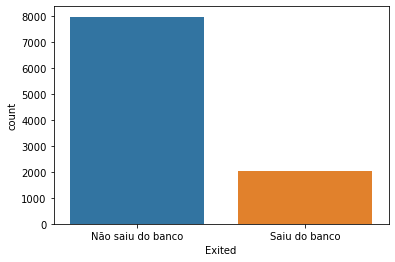

In [28]:
print(df_churn_clean.Exited.value_counts())
sns.countplot(x='Exited', data=df_churn_clean)
plt.xticks([0, 1], ['Não saiu do banco', 'Saiu do banco'])
plt.show()

#### Média de valores do dataframe agrupado por aqueles que sairam e os que não sairam do banco.

In [14]:
print(df_churn_clean.groupby('Exited').mean())
#PESSOAS QUE SAIRAM DO BANCO SÃO EM MÉDIA 7 ANOS MAIS VELHAS DO QUE AS QUE ESTÃO NO BANCO, SÃO MENOS ATIVAS(IsActiveMember) 
#E TEM MAIS DINHEIRO (Balance)

          RowNumber    CustomerId  CreditScore        Age    Tenure  \
Exited                                                                
0       5024.694964  1.569117e+07   651.853196  37.408389  5.033279   
1       4905.917526  1.569005e+07   645.351497  44.837997  4.932744   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Exited                                                           
0       72745.296779       1.544267   0.707146        0.554565   
1       91108.539337       1.475209   0.699067        0.360825   

        EstimatedSalary   Germany     Spain      Male  
Exited                                                 
0          99738.391772  0.212859  0.259199  0.572523  
1         101465.677531  0.399607  0.202749  0.440844  


#### Média de valores do dataframe agrupado por gênero, sendo 0 = female e 1 = male.

In [15]:
print(df_churn_clean.groupby('Male').mean())
#GENDER FEMALE NORMALMENTE SAI MAIS DA EMPRESA QUE HOMENS

        RowNumber    CustomerId  CreditScore        Age    Tenure  \
Male                                                                
0     4942.929562  1.569115e+07   650.831389  39.238389  4.966102   
1     5048.427891  1.569077e+07   650.276892  38.658237  5.051677   

           Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Male                                                                            
0     75659.369139       1.544134   0.702619        0.502751    100601.541382   
1     77173.974506       1.518600   0.707898        0.525380     99664.576931   

        Exited   Germany     Spain  
Male                                
0     0.250715  0.262602  0.239709  
1     0.164559  0.241158  0.254352  


#### Gráfico mostrando os valores de pessoas que sairam e que não do banco, agrupado por gênero.

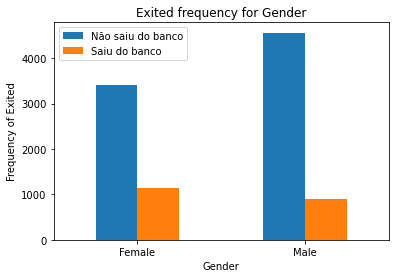

In [16]:
pd.crosstab(df_churn_clean.Male,df_churn_clean.Exited).plot(kind='bar')
plt.title('Exited frequency for Gender')
plt.legend(['Não saiu do banco', 'Saiu do banco'])
plt.xticks([0, 1], ['Female', 'Male'], rotation='horizontal')
plt.xlabel('Gender')
plt.ylabel('Frequency of Exited')
plt.show()

#### Histograma de idade, faixa etaria mais frequente dos clientes do banco é entre 30 e 40 anos.

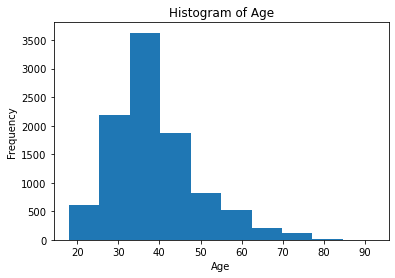

In [17]:
plt.hist(df_churn_clean.Age)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

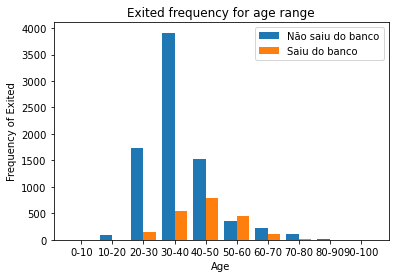

In [18]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

df_age_ranges_exited = df_churn_clean.copy()
df_age_ranges_exited.Exited = df_age_ranges_exited.Exited.map({0: 1, 1: 0})
df_age_ranges_exited = df_age_ranges_exited.groupby(pd.cut(df_churn_clean['Age'], bins=bins, labels=labels)).sum()
df_age_ranges_exited.index = df_age_ranges_exited.index.rename('range')
df_age_ranges_exited = df_age_ranges_exited.reset_index()

df_age_ranges = df_churn_clean.groupby(pd.cut(df_churn_clean['Age'], bins=bins, labels=labels)).sum()
df_age_ranges.index = df_age_ranges.index.rename('range')
df_age_ranges = df_age_ranges.reset_index()

ticks = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.bar(ticks, df_age_ranges_exited.Exited, width=0.4)
plt.bar(ticks + 0.4, df_age_ranges.Exited, width=0.4)
plt.xticks(ticks + 0.2, labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
plt.title('Exited frequency for age range')
plt.xlabel('Age')
plt.ylabel('Frequency of Exited')
plt.legend(['Não saiu do banco', 'Saiu do banco'])
plt.show()

In [30]:
print("Standard Deviation CreditScore:", np.std(df_churn_clean.CreditScore))
print("Standard Deviation Balance:", np.std(df_churn_clean.Balance))
print("Standard Deviation EstimatedSalary:", np.std(df_churn_clean.EstimatedSalary))

print("Amplitude CreditScore:", max(df_churn_clean.EstimatedSalary) - min(df_churn_clean.EstimatedSalary))
print("Amplitude Balance:", max(df_churn_clean.Balance) - min(df_churn_clean.Balance))
print("Amplitude EstimatedSalary:", max(df_churn_clean.EstimatedSalary) - min(df_churn_clean.EstimatedSalary))

Standard Deviation CreditScore: 96.64846595037113
Standard Deviation Balance: 62394.285254125454
Standard Deviation EstimatedSalary: 57507.61722116562
Amplitude CreditScore: 199980.90000000002
Amplitude Balance: 250898.09
Amplitude EstimatedSalary: 199980.90000000002


## Machine Learning

Retirando colunas desnecessárias para o treinamento do algoritmo.

In [20]:
X = df_churn_clean.drop(['Exited', 'CustomerId', 'RowNumber'], axis=1)
y = df_churn_clean.Exited

Separando os dados em 80% para treinar o algoritmo e 20% para testar

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Algoritmos de machine learning

Usei o método de RandomForest por ser um dos melhores no objetivo de classificar, logo após testei também com Regressão Logistíca por que o resultado esperado é apenas 0 ou 1, também sendo um bom algoritmo de classificação binaria.

Coloquei o peso das classes(colunas) como "balanced" pois os dados eram muito diferentes uns dos outros, enquanto o salário estava com valores na casa de milhares, havia colunas com valores 0 ou 1.

In [22]:
# Random Forest apresenta uma boa precisão e accuracy.
randomforest = RandomForestClassifier(n_estimators=800, class_weight="balanced")  
randomforest.fit(x_train, y_train)  
predictions = randomforest.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1594
           1       0.78      0.47      0.59       406

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

[[1541   53]
 [ 216  190]]


In [23]:
# Logistic Regression apresenta um bom recall e uma accuracy razoável.
logreg = LogisticRegression(max_iter=150, class_weight="balanced")
logreg.fit(x_train, y_train)
predictions_logreg = logreg.predict(x_test)
print(classification_report(y_test, predictions_logreg))
print(confusion_matrix(y_test, predictions_logreg))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1594
           1       0.32      0.65      0.43       406

    accuracy                           0.65      2000
   macro avg       0.60      0.65      0.59      2000
weighted avg       0.76      0.65      0.68      2000

[[1032  562]
 [ 143  263]]


## Conclusões

Ao meu ver, pensei primeiramente em usar a random forest pela sua accuracy incrivel, mas depois notei que a regressão logística é muito melhor.

Para o banco, seria melhor ter mais pessoas sendo classificadas erroneamente como que saissem do banco, para ter uma forma de contê-las na instituição (e bem menos prejuízo) do que haver pessoas classificadas como que não sairiam do banco e que acabassem saindo sem que o banco fizesse algo.

Por isso, para avaliar a performance do algoritmo, utilizei o recall como base, que avalia pelo falso negativo, quanto maior o valor, menos falso negativo há.

## Prevendo os dados

In [24]:
X_teste = df_predict_churn_clean.drop(['CustomerId', 'RowNumber'], axis=1)

X = df_churn_clean.drop(['Exited', 'CustomerId', 'RowNumber'], axis=1)
y = df_churn_clean.Exited

In [25]:
logregression = LogisticRegression(class_weight='balanced', max_iter=150)
logregression.fit(X, y)
predictions = logregression.predict(X_teste)

In [26]:
predicted_values = pd.DataFrame()
predicted_values['rowNumber'] = df_predict_churn_clean.RowNumber
predicted_values['predictedValues'] = predictions.reshape(-1, 1)
print(predicted_values)

     rowNumber  predictedValues
0        10001                0
1        10002                0
2        10003                0
3        10004                0
4        10005                0
..         ...              ...
995      10996                1
996      10997                1
997      10998                1
998      10999                0
999      11000                0

[1000 rows x 2 columns]


In [32]:
predicted_values.to_csv('Teste.csv', index = False, sep=';')